<div align = 'center'>
 <h3> SVM CLASSIFICATION ON BREAST CANCER DATASET </h3>
</div>

### OBJECTIVE
The objective of this project is to classify breast cancer cases using Suppot Vector Machines(SVM) with both linear and non linear kernels. The goal is to train, evaluate, and visualize model performance and interpret the impact of hyperparameters.

### IMPORTING LIBRARIES

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### LOADING AND PREPROCESS DATASET

In [22]:
data = pd.read_csv("C:/Users/Pranjal Oza/Elevate_Lab/breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
data.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
#Encode categorical features

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] =LabelEncoder().fit_transform(data[col])

x = data.drop('diagnosis', axis = 1)
y = data['diagnosis']


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#Splitting the dataset into train test
x_train, x_test , y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state = 42)

### SVM with Linear and RBF Kernel

In [40]:
# Linear kernel SVM
svm_linear = SVC(kernel ='linear')
svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)


print("Linear Kernel Accuracy:\n", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

Linear Kernel Accuracy:
 0.956140350877193
Confusion Matrix:
 [[68  3]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [44]:
#RBF kernel SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)
y_pred_rbf =  svm_rbf.predict(x_test)

print("RBF Kernel Accuracy:\n", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

RBF Kernel Accuracy:
 0.9824561403508771
Confusion Matrix:
 [[71  0]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### HYPERPARAMETER TUNING  WITH  GridSearchCV

In [51]:
# Defining paramter grid
param_grid ={
    'C' : [0.1, 1, 10],
    'gamma' : ['scale', 0.01 , 0.001],
    'kernel' : ['rbf']
}

#Perform grid search
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(x_train,y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


#Evaluating best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(x_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.9736263736263737
Best Model Accuracy: 0.9824561403508771


### CROSS VALIDATION

In [54]:
scores = cross_val_score(best_model, X_scaled, y, cv = 5)
print("Cross validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross validation Accuracy Scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean Accuracy: 0.9736376339077782


### DECISION BOUNDARY VISUALIZATION

In [57]:
# Reduce dimensions for visualization
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X_scaled)
x_train_pca, x_test_pca, y_train_pca, y_test_pca= train_test_split(x_pca, y, test_size = 0.2, random_state = 42)

#train RBF SVM  on 2D  data
svm_vis = SVC(kernel='rbf', C = 1,  gamma = 'scale')
svm_vis.fit(x_train_pca, y_train_pca)

SVC(C=1)

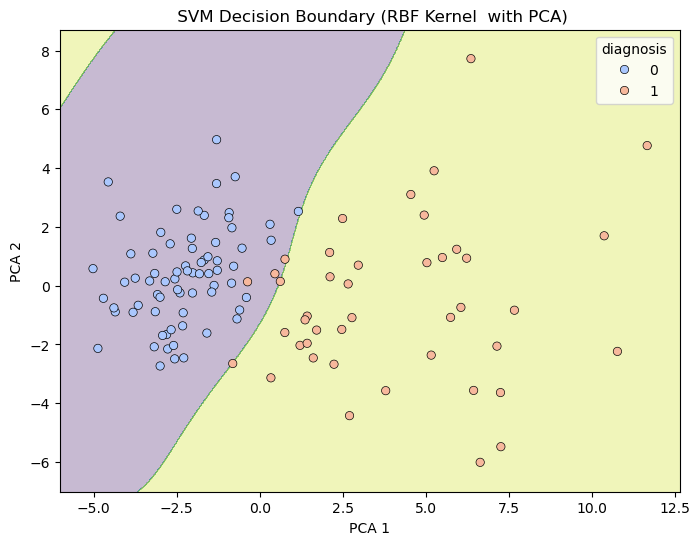

In [59]:
#Plotting
def plot_decision_boundary(x,y,model,title):
    h = 0.02
    x_min, x_max,  = x[:,0].min() - 1, x[:,0].max() + 1
    y_min , y_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min,x_max, h),
             np.arange(y_min, y_max, h))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)


    plt.figure(figsize = (8,6))
    plt.contourf(xx,yy,z,alpha=0.3)
    sns.scatterplot(x=x[:,0],y=x[:,1], hue= y, palette ='coolwarm', edgecolor = 'k')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()
plot_decision_boundary(x_test_pca, y_test_pca, svm_vis," SVM Decision Boundary (RBF Kernel  with PCA)")

In [61]:
# Evaluate predictions on PCA-transformed test set
y_pred_pca = svm_vis.predict(x_test_pca)

# Print evaluation metrics
print("📊 Accuracy on PCA-Reduced Test Set:", accuracy_score(y_test_pca, y_pred_pca))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test_pca, y_pred_pca))


📊 Accuracy on PCA-Reduced Test Set: 0.9736842105263158

Confusion Matrix:
 [[71  0]
 [ 3 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



###  Conclusion for Decision Boundary Visualization (PCA to 2D)
- The decision boundary plot provides a clear visual representation of how the SVM classifier separates the two classes in a reduced 2D space.
- Despite dimensionality reduction through PCA, the model was able to distinguish most of the classes effectively.
-  This indicates that the first two principal components captured a significant portion of the variance in the original dataset.
-   However, some overlapping regions suggest that more complex boundaries or higher-dimensional data may further improve classification performance.